# Question:
How does changing threshold of CD-HIT clustering affect intra-cluster ARO consistency?

# Method:
We have several sets of pangenome at different clustering threshold: 0.70, 0.80, 0.90, 0.95, 0.97. in `~/data0118/cdhit/clstr/SPECIES-THRESHOLD.clstr`, which is already parsed into `.clstr.tab`
We have 100 E.coli genomes with CARD annotation parsed stored at `~/data/genePredicted/card_detail_df/GENOME_ID` in the format of dataframe.

1. find all cluster members in `.clstr` in the format of `GENE_NAME|GENOME_ID`
2. find the card annotation in `dataframe`
3. 

In [4]:
import pandas as pd
df = pd.read_csv("/home/hermuba/data0118/cdhit/clstr/cluster_detail/Escherichia0.95.clstr.tab", sep = '\t')

In [9]:
# just to show
df.head()

,Cluster,representing_gene,members
0,Cluster 0,562.23904.con.0022_83|562.23904,",562.22520.con.0036_12|562.22520,562.22792.con..."
1,Cluster 1,562.23473.con.0029_33|562.23473,",562.22913.con.0047_1|562.22913,562.22520.con...."
2,Cluster 2,562.22879.con.0002_79|562.22879,",562.23497.con.0017_50|562.23497,562.23864.con..."
3,Cluster 3,562.23616.con.0006_146|562.23616,",562.23616.con.0006_146|562.23616,562.23862.co..."
4,Cluster 4,562.22913.con.0045_7|562.22913,",562.22913.con.0045_7|562.22913"


In [10]:
# randomly choose 100 genomes and run CARD for them
import os
mypath = '/home/hermuba/data0118/predicted_genes/card/'
onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

In [2]:
def split_genome(s):
        return(s.split('|')[1])
def extract_card_clus(filename):
    """
    input: filename = SPECIES + THRESHOLD
    output: df with representing genes with CARD annotations
    """
    rep_with_card = pd.read_pickle("/home/hermuba/data0118/cdhit/card/"+ filename+"_df").index
    clus_detail = pd.read_csv("/home/hermuba/data0118/cdhit/clstr/cluster_detail/" + filename + ".clstr.tab", sep = '\t')
    combined_detail = clus_detail.loc[clus_detail['representing_gene'].isin(rep_with_card)]
    combined_detail['rep_genome'] = combined_detail['representing_gene'].map(split_genome)
    return(combined_detail)

In [11]:
# just to show data
d = extract_card_clus("Escherichia0.95")
d.head()

/home/hermuba/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Cluster,representing_gene,members,rep_genome
751,Cluster 751,JMUY01000001_298|1438670.3,",JMUY01000001_298|1438670.3,562.23090.con.0016...",1438670.3
969,Cluster 969,FLWH01000008_305|562.12962,",FLWH01000008_305|562.12962,FLXF01000002_43|56...",562.12962
970,Cluster 970,JMUY01000005_247|1438670.3,",JMUY01000005_247|1438670.3,562.23090.con.0003...",1438670.3
981,Cluster 981,562.22643.con.0016_59|562.22643,",JMUY01000002_89|1438670.3,562.23090.con.0011_...",562.22643
996,Cluster 996,562.23443.con.0013_1|562.23443,",JMUY01000003_339|1438670.3,562.23090.con.0015...",562.23443


In [32]:
def find_card(genome_id, gene_name):
    """
    to get card annotation from file
    input: genome id and gene name
    output: card ARO
    """
    card = pd.read_pickle(mypath + genome_id)
    return(card.loc[gene_name, 'ARO_name'])
def find_mem_card(df):
    """
    find all aro (if exist) within a cluster, if the member belongs to the 100 genome
    input: df with cluster id and its member
    output: list of list 
    [Cluster_1_list, Cluster_2_list...]
    Cluster_1_list = [ARO_for_member1, ARO_for_member2]
    """
    clus_aros = []
    for clus in df['members']:
        clus_mem = clus.split(',')[1:]
        all_aro = []
        for mem in clus_mem:
            gene_name = mem.split('|')[0]
            genome_id = mem.split('|')[1]
            if genome_id in onlyfiles:
                
                try: 
                    aro = find_card(genome_id, gene_name)
                    all_aro.append(aro)
                except KeyError:
                    #print(gene_name, genome_id, 'card annotation not found')
                    do_nothing = 0
        clus_aros.append(all_aro)
    return(clus_aros)
def consistency(l):
    df = pd.DataFrame(columns = ['members', 'no_members', 'cluster_size'])
    for clus in l:
        if len(clus)>0:
            members = set(clus)
            how_many_kind = len(members)
            no_member = len(clus)
            df.loc[clus[0]] = [members, how_many_kind, no_member]
    return(df)
    

In [ ]:
# demo
x = find_mem_card(d)
df = consistency(x)

In [26]:
df.head()

,members,no_members,cluster_size
mfd,{mfd},1,94
acrB,{acrB},1,94
acrD,{acrD},1,93
AcrF,{AcrF},1,93
mdtB,{mdtB},1,94


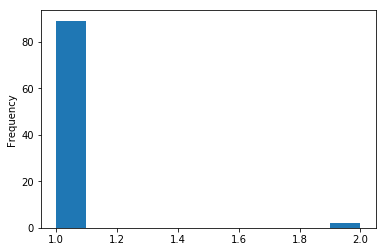

In [29]:
%matplotlib inline
df['no_members'].plot(kind = 'hist')

/home/hermuba/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


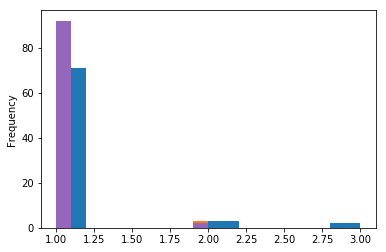

In [38]:
thres = ['0.70', '0.80', '0.90', '0.95', '0.97']
def run_all(thres):
    card_member = find_mem_card(extract_card_clus("Escherichia" + thres))
    c = consistency(card_member)
    return(c)
for t in thres:
    c = run_all(t)
    c['no_members'].plot(kind = 'hist')
    

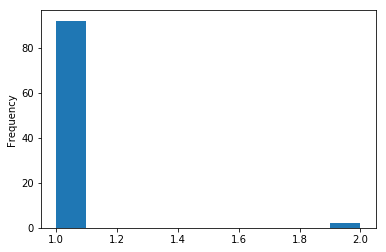

In [37]:
c['no_members'].plot(kind = 'hist')

/home/hermuba/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


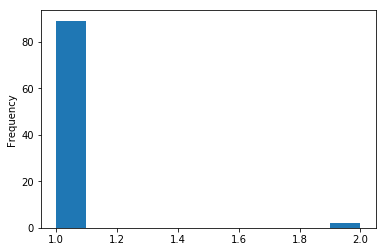

In [39]:
c = run_all('0.95')
c['no_members'].plot(kind = 'hist')

/home/hermuba/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


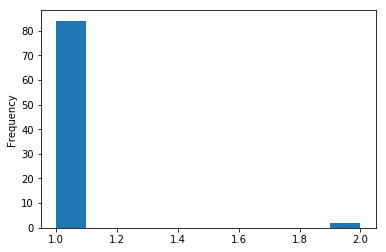

In [40]:
c = run_all('0.90')
c['no_members'].plot(kind = 'hist')

/home/hermuba/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


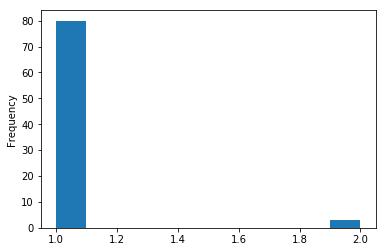

In [41]:
c = run_all('0.80')
c['no_members'].plot(kind = 'hist')

/home/hermuba/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


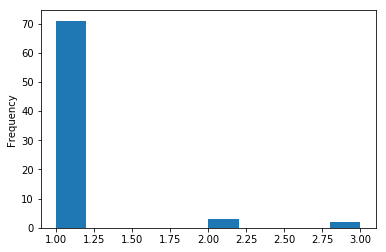

In [42]:
c = run_all('0.70')
c['no_members'].plot(kind = 'hist')